In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

import mlgrad.func as func
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.dissimilarity as dissimilarity
import mlgrad.pbsag as pbsag

import matplotlib.pyplot as plt

In [2]:
X_r = np.random.random(300)
Y_r = np.random.random(300)
X_r = 3 * X_r
Y_r = 3 * Y_r ** 3.0
X0 = np.linspace(0.0, 3.0, 100)
Y0 = 0.9 * X0

X = np.concatenate((X_r, X0))
Y = np.concatenate((Y_r, Y0))
Xv = X.reshape(-1,1)


In [3]:
loss_func = loss.Loss(func.Square())
loss_func

In [4]:
penalty_func = dissimilarity.Dissimilarity(func.Quantile_AlphaLog(0.001, 0.25))
penalty_func

In [5]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)
#print(np.array(lm_learn.param))

alg = pbsag.PbSAG(lm_learn, loss_func, penalty_func, h=0.002, tol=1.0e-5, n_iter=10000)
alg.fit(Xv, Y)
print("K:", alg.K, "param:", np.array(lm_learn.param))

K: 25 param: [-0.02665936  0.91566742]


In [6]:
# param_init2 = np.random.random((2,))
# lm_learn2 = model.LinearModel(param_init2)
# print(np.array(lm_learn2.param))

# alg2 = sag.SAG(lm_learn2, loss.QuantileLoss(0.8), h=0.05, tol=1.0e-5, max_epoch=10000, ls=0)
# alg2.fit(Xv, Y)
# print("K:", alg2.K, "h:", alg2.h, "param:", np.array(lm_learn2.param))

In [7]:
ransac = lm.RANSACRegressor()
ransac.fit(Xv, Y)
lsm = lm.LinearRegression()
lsm.fit(Xv, Y)
theil = lm.TheilSenRegressor()
theil.fit(Xv, Y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

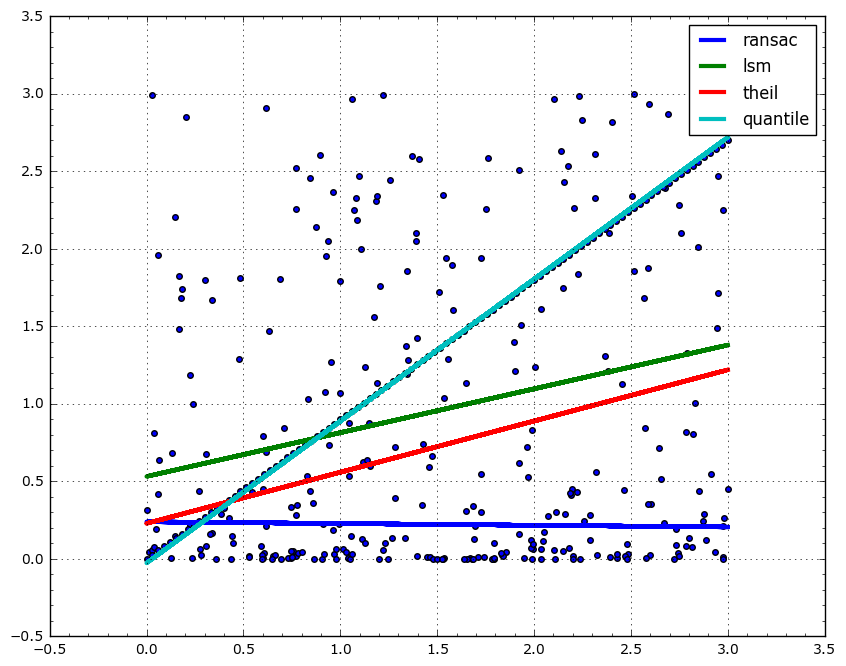

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, s=16)
plt.plot(X, ransac.predict(Xv), label='ransac', linewidth=3.0)
plt.plot(X, lsm.predict(Xv), label='lsm', linewidth=3.0)
plt.plot(X, theil.predict(Xv), label='theil', linewidth=3.0)
plt.plot(X, lm_learn.evaluate_all(Xv), label='quantile', linewidth=3.0)
#plt.plot(X, [lm_learn2.evaluate(x) for x in Xv], label='quantile_sag', linewidth=3.0)
plt.grid(1)
plt.minorticks_on()
plt.legend(loc='best')
plt.show()